# <b> Naive Bayes </b>
___

<b> Table of Content: </b>
<br> <b> [Pipeline_1](#800) </b>
<br> [1.0 Basic Model: Naive Bayes](#80010)
<br> [1.1 Oversampling (SMOTE)](#80011)
<br> [1.2 Undersampling (NearMiss)](#80012)
<br> [1.3 Cross Validation (Oversampling)](#80013)
<br> [1.4 Cross Validation (Undersampling)](#80014)
<br> [1.5 Feature Importance](#80015)
<br>  <b>  [Pipeline 2](#801) </b>
<br> [2.0 Basic Model: Naive Bayes](#80020)
<br> [2.1 Oversampling (SMOTE)](#80021)
<br> [2.2 Undersampling (NearMiss)](#80022)
<br> [2.3 Cross Validation (Oversampling)](#80023)
<br> [2.4 Cross Validation (Undersampling)](#80024)
<br> [2.5 Feature Importance](#80025)
<br>  <b>[Pipeline 3](#802) </b>
<br> [3.0 Basic Model: Naive Bayes](#80030)
<br> [3.1 Oversampling (SMOTE)](#80031)
<br> [3.2 Undersampling (NearMiss)](#80032)
<br> [3.3 Cross Validation (Oversampling)](#80033)
<br> [3.4 Cross Validation (Undersampling)](#80034)
<br> [3.5 Cross Validation (Undersampling)](#80035)
<br> <b> [Results](#810) </b>
___

<b> Loading Required Modules

In [134]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

# Cross Validation packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# ROC Curve and AUC
from sklearn.metrics import roc_auc_score

# for plotting
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [135]:
# packages for Receiver Operating Characteristic (ROC) with cross validation
# source: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_roc_crossval.html
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve

Automatically created module for IPython interactive environment


<a id = "800"> <h2> Pipeline 1 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [136]:
df_pipeline1 = pd.read_csv("pipeline_1.csv")

<b> show all columns in dataset

In [137]:
print('There are', len(df_pipeline1.columns)-1, 'features, and the target `Revenue` for pipeline 1:')
list(df_pipeline1.columns)

There are 22 features, and the target `Revenue` for pipeline 1:


['Q4',
 'VisitorType_New_Visitor',
 'Q3',
 'TrafficType_2',
 'TrafficType_8',
 'TrafficType_3',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'TrafficType_13',
 'ExitRates_iqr_yj_zscore',
 'OperatingSystems_3',
 'Administrative_Duration_iqr_yj_zscore',
 'TrafficType_1',
 'SpecialDay_0.8',
 'Month_Feb',
 'Browser_6',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

In [138]:
print('Number of rows in the dataset:', df_pipeline1.shape[0])
print('Number of columns in the dataset:', df_pipeline1.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 23


<a id = "80010"> <h2> 1.0 Basic Model Naive Bayes </h2> </a>

<b> Define Features and Target variables

In [139]:
X = df_pipeline1.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline1.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [140]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))  
print("Before OverSampling, counts of label '1' in y_train: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in y_train: {}".format(sum(y_train == 0)))
print('\n')

# given a trained model, predict the label of a new set of data.
y_pred = gnb.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

Before OverSampling, the shape of train_X: (8631, 22)
Before OverSampling, counts of label '1' in y_train: 1340
Before OverSampling, counts of label '0' in y_train: 7291


              precision    recall  f1-score   support

           0       0.96      0.76      0.85      3131
           1       0.38      0.84      0.53       568

    accuracy                           0.77      3699
   macro avg       0.67      0.80      0.69      3699
weighted avg       0.87      0.77      0.80      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling/undersampling)

In [141]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=gnb):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

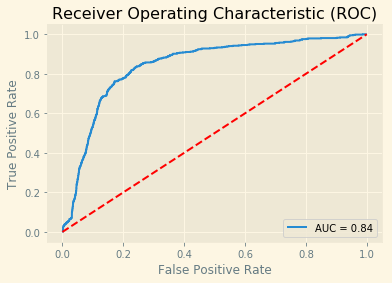

AUC score: 0.8418990467879137


In [142]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=gnb)

<a id = "80011"> <h2> 1.1 Oversampling (SMOTE) </h2> </a>
We oversample the <b> training </b> dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [143]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 22)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The SMOTE Algorithm has oversampled the instances in the minority class and made it equal to majority class:
* Both classes (0 & 1) now have 7291 instances, the <b> training </b> dataset is balanced.
* Class 1 increased from 1340 instances to 7291 instances, an increase of 5951 instances of class 1.

In [144]:
# define the model
gnb1 = GaussianNB()

# train the model
gnb1.fit(X_train_res, y_train_res)

# given a trained model, predict the label of a new set of data. 
y_pred = gnb1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.49      0.65      3131
           1       0.25      0.93      0.39       568

    accuracy                           0.56      3699
   macro avg       0.61      0.71      0.52      3699
weighted avg       0.86      0.56      0.61      3699



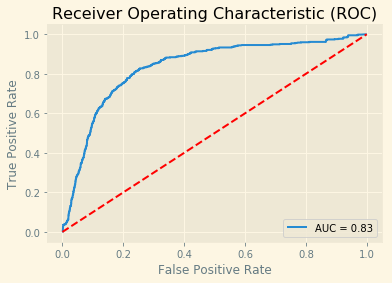

AUC score: 0.8341440771746416


In [145]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=gnb1)

<a id = "80012"> <h2> 1.2 Undersampling (NearMiss)  </h2> </a>
We undersample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [146]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, the shape of train_X: (2680, 22)
After Undersampling, the shape of train_y: (2680,) 

After Undersampling, counts of label '1': 1340
After Undersampling, counts of label '0': 1340


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The NearMiss Algorithm has undersampled the instances in the majority class and made it equal to minority class:
* Both classes (0 & 1) now have 1340 instances, the dataset is balanced.
* Class 0 decreased from 7291 instances to 1340 instances, a decrease of 5951 instances of class 0.

In [147]:
# train the model on train set 
gnb2 = GaussianNB()
gnb2.fit(X_train_miss, y_train_miss) 
y_pred = gnb2.predict(X_test) 

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3131
           1       0.07      0.05      0.06       568

    accuracy                           0.75      3699
   macro avg       0.45      0.47      0.46      3699
weighted avg       0.72      0.75      0.73      3699



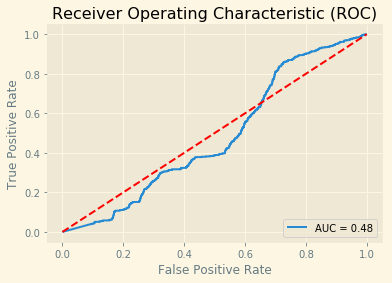

AUC score: 0.48148315797049945


In [148]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=gnb2)

## Cross Validation Using KFold </b>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<a id = "80013"> <h2> 1.3 Cross Validation (Oversampling)  </h2> </a>

We oversample X and Y with cross validation and NOT using the previously employed 1 hold-out method!

In [149]:
sm = SMOTE(random_state = 2019) 
X_res, y_res = sm.fit_sample(X, Y) 

print('After OverSampling, the shape of X_res: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y_res: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X_res: (20844, 22)
After OverSampling, the shape of y_res: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [150]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result = cross_val_score(gnb1, X_res, y_res, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(gnb1, X_res, y_res, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(gnb1, X_res, y_res, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')


print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.70011478 0.69149571 0.67908945 0.67209398 0.69453411 0.69221646
 0.6377632  0.67846401 0.66345599 0.67769786] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.6787 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.85228354 0.85720609 0.85279273 0.84193451 0.8553716  0.85090056
 0.84489718 0.83983154 0.83975818 0.84961085] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.84845867701

<b> ROC Curve Cross validation on oversampled dataset

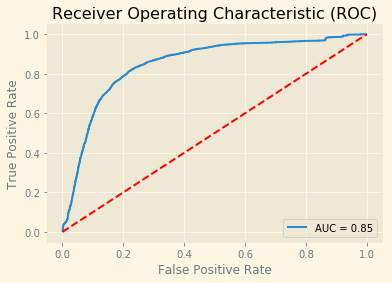

AUC score: 0.8493714223498916


In [151]:
# roc curve with KFold
roc_curve(X_test=X_res, y_test=y_res, model=gnb1)

<a id = "80014"> <h2> 1.4 Cross Validation (Undersampling)  </h2> </a>

In [152]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_miss, y_miss = nr.fit_sample(X, Y)

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result = cross_val_score(gnb2, X_miss, y_miss, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(gnb2, X_miss, y_miss, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(gnb2, X_miss, y_miss, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.53403141 0.54973822 0.53926702 0.5104712  0.53926702 0.58900524
 0.50918635 0.54593176 0.56167979 0.56430446] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.5443 

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.42175977 0.44433794 0.42280816 0.37775056 0.43134925 0.4884275
 0.38767445 0.4248522  0.43853863 0.45512951] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.4293 

---------------------

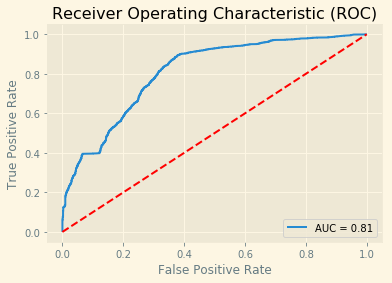

AUC score: 0.808836318667071


In [153]:
# roc curve with KFold
roc_curve(X_test=X_miss, y_test=y_miss, model=gnb2)

<b> Cross validation on X and Y

In [155]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(gnb1, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(gnb1, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(gnb1, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.7001 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.7269 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.8409


<a id = "80015"> <h2> 1.5 Feature Importance </h2> </a>

For Feature Importance we consider the oversampled trained/fitted model (named: 'gnb1') which has better results.

In [156]:
# class 0 variance
gnb1.sigma_[0]
# class 1 variance
gnb1.sigma_[1]

# mean of each feature per class
# array, shape (n_classes, n_features)
# class 0 mean
gnb1.theta_[0]
# class 1 mean
gnb1.theta_[1]

lst_variance_class_0 = []
lst_mean_class_0 = []
lst_features = []

for i in gnb1.sigma_[0]:
    lst_variance_class_0.append((i).round(2))
for j in list(X.columns):
        lst_features.append(j)
for k in gnb1.theta_[0]:
    lst_mean_class_0.append(k)
        
# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Variance Class 0": lst_variance_class_0,  "Mean Class 0":lst_mean_class_0}
df_class_0 = pd.DataFrame(dict_lists)
# sort descending and reset index
df_class_0.sort_values(by=['Variance Class 0'],  ascending=False, inplace=True)
df_class_0.reset_index(inplace=True, drop=True)
df_class_0

,Feature,Variance Class 0,Mean Class 0
0,ExitRates_iqr_yj_zscore,1.02,0.110567
1,Administrative_Duration_iqr_yj_zscore,0.98,-0.079885
2,Informational_Duration_pp_iqr_yj_zscore,0.92,-0.050411
3,PageValues_iqr_yj_zscore,0.56,-0.265990
4,Q4,0.24,0.400905
5,TrafficType_2,0.21,0.293924
6,OperatingSystems_3,0.17,0.214785
7,TrafficType_1,0.17,0.209436
8,TrafficType_3,0.15,0.179399
9,Q1,0.15,0.180771


In [157]:
lst_variance_class_1 = []
lst_mean_class_1 = []
lst_features = []

for i in gnb1.sigma_[1]:
    lst_variance_class_1.append((i).round(2))
for j in list(X.columns):
        lst_features.append(j)
for k in gnb1.theta_[1]:
    lst_mean_class_1.append(k)
        
# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Variance Class 1": lst_variance_class_1,  "Mean Class 1":lst_mean_class_1}
df_class_1 = pd.DataFrame(dict_lists)
# sort descending and reset index
df_class_1.sort_values(by=['Variance Class 1'],  ascending=False, inplace=True)
df_class_1.reset_index(inplace=True, drop=True)
df_class_1

,Feature,Variance Class 1,Mean Class 1
0,Informational_Duration_pp_iqr_yj_zscore,1.33,0.256528
1,PageValues_iqr_yj_zscore,0.92,1.463112
2,Administrative_Duration_iqr_yj_zscore,0.88,0.375475
3,ExitRates_iqr_yj_zscore,0.45,-0.600416
4,Q4,0.24,0.564058
5,TrafficType_2,0.24,0.444866
6,VisitorType_New_Visitor,0.16,0.208729
7,TrafficType_1,0.11,0.134020
8,Q3,0.10,0.113561
9,Q1,0.09,0.098447


<a id = "801"> <h2> Pipeline 2 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [158]:
df_pipeline2 = pd.read_csv("pipeline_2.csv")

<b> show all columns in dataset

In [159]:
print('There are', len(df_pipeline2.columns)-1, 'features, and the target `Revenue` for pipeline 2:')
list(df_pipeline2.columns)

There are 21 features, and the target `Revenue` for pipeline 2:


['TrafficType_15',
 'Month_Nov',
 'Administrative_Duration_mm_yj_stdev',
 'VisitorType_New_Visitor',
 'Informational_mm_yj_stdev',
 'TrafficType_2',
 'TrafficType_3',
 'ProductRelated_mm_yj_stdev',
 'PageValues_mm_yj_stdev',
 'Month_May',
 'TrafficType_13',
 'OperatingSystems_3',
 'TrafficType_1',
 'add_exit_bounce_rates_mm_yj_stdev',
 'Month_Mar',
 'TrafficType_18',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'TrafficType_12',
 'Browser_12',
 'Revenue']

In [160]:
print('Number of rows in the dataset:', df_pipeline2.shape[0])
print('Number of columns in the dataset:', df_pipeline2.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 22


<a id = "80020"> <h2> 2.0 Basic Model Naive Bayes </h2> </a>

<b> Define Features and Target variables

In [161]:
X = df_pipeline2.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline2.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [162]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))  
print("Before OverSampling, counts of label '1' in y_train: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in y_train: {}".format(sum(y_train == 0)))
print('\n')

# given a trained model, predict the label of a new set of data.
y_pred = gnb.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

Before OverSampling, the shape of train_X: (8631, 21)
Before OverSampling, counts of label '1' in y_train: 1340
Before OverSampling, counts of label '0' in y_train: 7291


              precision    recall  f1-score   support

           0       0.98      0.06      0.11      3131
           1       0.16      0.99      0.28       568

    accuracy                           0.20      3699
   macro avg       0.57      0.53      0.19      3699
weighted avg       0.85      0.20      0.13      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling/undersampling)

In [163]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=gnb):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

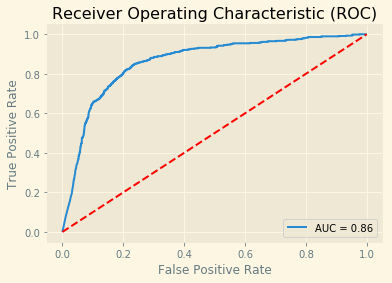

AUC score: 0.8616388927625157


In [164]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=gnb)

<a id = "80021"> <h2> 2.1 Oversampling (SMOTE) </h2> </a>
We oversample the <b> training </b> dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [165]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 21)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The SMOTE Algorithm has oversampled the instances in the minority class and made it equal to majority class:
* Both classes (0 & 1) now have 7291 instances, the <b> training </b> dataset is balanced.
* Class 1 increased from 1340 instances to 7291 instances, an increase of 5951 instances of class 1.

In [166]:
# define the model
gnb1 = GaussianNB()

# train the model
gnb1.fit(X_train_res, y_train_res)

# given a trained model, predict the label of a new set of data. 
y_pred = gnb1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.05      0.10      3131
           1       0.16      0.99      0.28       568

    accuracy                           0.20      3699
   macro avg       0.57      0.52      0.19      3699
weighted avg       0.85      0.20      0.13      3699



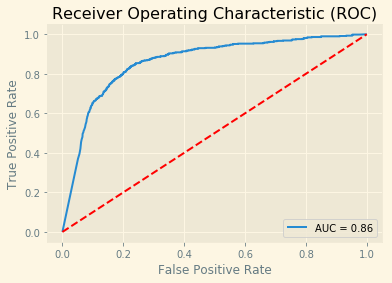

AUC score: 0.8614626115042218


In [167]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=gnb1)

<a id = "80022"> <h2> 2.2 Undersampling (NearMiss)  </h2> </a>
We undersample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [168]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, the shape of train_X: (2680, 21)
After Undersampling, the shape of train_y: (2680,) 

After Undersampling, counts of label '1': 1340
After Undersampling, counts of label '0': 1340


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The NearMiss Algorithm has undersampled the instances in the majority class and made it equal to minority class:
* Both classes (0 & 1) now have 1340 instances, the dataset is balanced.
* Class 0 decreased from 7291 instances to 1340 instances, a decrease of 5951 instances of class 0.

In [169]:
# train the model on train set 
gnb2 = GaussianNB()
gnb2.fit(X_train_miss, y_train_miss) 
y_pred = gnb2.predict(X_test) 

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      3131
           1       0.10      0.08      0.08       568

    accuracy                           0.75      3699
   macro avg       0.47      0.47      0.47      3699
weighted avg       0.72      0.75      0.74      3699



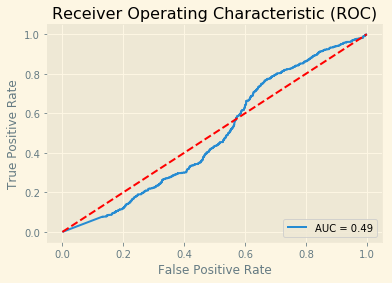

AUC score: 0.4887047854035744


In [170]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=gnb2)

## Cross Validation Using KFold </b>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<a id = "80023"> <h2> 2.3 Cross Validation (Oversampling)  </h2> </a>

We oversample X and Y with cross validation and NOT using the previously employed 1 hold-out method!

In [171]:
sm = SMOTE(random_state = 2019) 
X_res, y_res = sm.fit_sample(X, Y) 

print('After OverSampling, the shape of X_res: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y_res: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X_res: (20844, 21)
After OverSampling, the shape of y_res: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [172]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result = cross_val_score(gnb1, X_res, y_res, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(gnb1, X_res, y_res, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(gnb1, X_res, y_res, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')


print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.40356676 0.38556414 0.39414779 0.41767288 0.37471274 0.37887938
 0.36428335 0.40119862 0.38223353 0.39394369] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.3896 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.87553716 0.88007185 0.87809984 0.87483983 0.88006333 0.88424541
 0.87401537 0.86963758 0.87186276 0.88104034] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.87694134608

<b> ROC Curve Cross validation on oversampled dataset

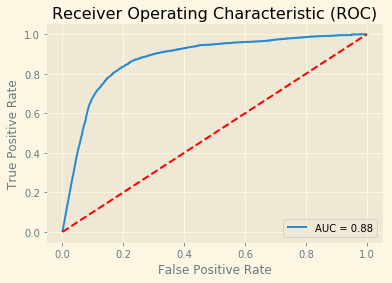

AUC score: 0.8772296793598385


In [173]:
# roc curve with KFold
roc_curve(X_test=X_res, y_test=y_res, model=gnb1)

<a id = "80024"> <h2> 2.4 Cross Validation (Undersampling)  </h2> </a>

In [174]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_miss, y_miss = nr.fit_sample(X, Y)

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result = cross_val_score(gnb2, X_miss, y_miss, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(gnb2, X_miss, y_miss, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(gnb2, X_miss, y_miss, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.51832461 0.54188482 0.53141361 0.5026178  0.52879581 0.56544503
 0.50656168 0.54855643 0.57217848 0.5511811 ] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.5367 

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.39538279 0.42298442 0.41804536 0.35792228 0.40479386 0.43621179
 0.38263931 0.43667694 0.46547664 0.43010138] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.415 

---------------------

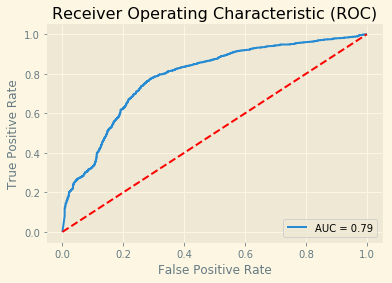

AUC score: 0.7859278377701304


In [175]:
# roc curve with KFold
roc_curve(X_test=X_miss, y_test=y_miss, model=gnb2)

<b> Cross validation on X and Y

In [176]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(gnb1, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(gnb1, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(gnb1, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.2107 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.15 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.8693


<a id = "80025"> <h2> 2.5 Feature Importance </h2> </a>

For Feature Importance we consider the oversampled trained/fitted model (named: 'gnb1') which has better results.

In [177]:
# class 0 variance
gnb1.sigma_[0]
# class 1 variance
gnb1.sigma_[1]

# mean of each feature per class
# array, shape (n_classes, n_features)
# class 0 mean
gnb1.theta_[0]
# class 1 mean
gnb1.theta_[1]

lst_variance_class_0 = []
lst_mean_class_0 = []
lst_features = []

for i in gnb1.sigma_[0]:
    lst_variance_class_0.append((i).round(2))
for j in list(X.columns):
        lst_features.append(j)
for k in gnb1.theta_[0]:
    lst_mean_class_0.append(k)
        
# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Variance Class 0": lst_variance_class_0,  "Mean Class 0":lst_mean_class_0}
df_class_0 = pd.DataFrame(dict_lists)
# sort descending and reset index
df_class_0.sort_values(by=['Variance Class 0'],  ascending=False, inplace=True)
df_class_0.reset_index(inplace=True, drop=True)
df_class_0

,Feature,Variance Class 0,Mean Class 0
0,TrafficType_2,0.21,0.293924
1,Month_May,0.21,0.291181
2,Month_Nov,0.17,0.216431
3,OperatingSystems_3,0.17,0.214785
4,TrafficType_1,0.17,0.209436
5,TrafficType_3,0.15,0.179399
6,Month_Mar,0.14,0.164586
7,VisitorType_New_Visitor,0.11,0.120697
8,TrafficType_13,0.06,0.066932
9,SpecialDay_0.8,0.03,0.031957


In [178]:
lst_variance_class_1 = []
lst_mean_class_1 = []
lst_features = []

for i in gnb1.sigma_[1]:
    lst_variance_class_1.append((i).round(2))
for j in list(X.columns):
        lst_features.append(j)
for k in gnb1.theta_[1]:
    lst_mean_class_1.append(k)
        
# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Variance Class 1": lst_variance_class_1,  "Mean Class 1":lst_mean_class_1}
df_class_1 = pd.DataFrame(dict_lists)
# sort descending and reset index
df_class_1.sort_values(by=['Variance Class 1'],  ascending=False, inplace=True)
df_class_1.reset_index(inplace=True, drop=True)
df_class_1

,Feature,Variance Class 1,Mean Class 1
0,TrafficType_2,0.25,0.441505
1,Month_Nov,0.24,0.387558
2,VisitorType_New_Visitor,0.17,0.215610
3,Month_May,0.16,0.203661
4,TrafficType_1,0.12,0.135038
5,OperatingSystems_3,0.10,0.120462
6,Month_Mar,0.09,0.101457
7,TrafficType_3,0.07,0.081869
8,TrafficType_8,0.05,0.048113
9,TrafficType_13,0.02,0.022953


<a id = "802"> <h2> Pipeline 3 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [179]:
df_pipeline3 = pd.read_csv("pipeline_3.csv")

<b> show all columns in dataset

In [180]:
print('There are', len(df_pipeline3.columns)-1, 'features, and the target `Revenue` for pipeline 3:')
list(df_pipeline3.columns)

There are 23 features, and the target `Revenue` for pipeline 3:


['Administrative_yj_stdev_zscore',
 'Month_Nov',
 'VisitorType_New_Visitor',
 'TrafficType_2',
 'Month_May',
 'TrafficType_3',
 'add_exit_bounce_rates_yj_stdev_zscore',
 'TrafficType_13',
 'PageValues_yj_stdev_zscore',
 'OperatingSystems_3',
 'TrafficType_1',
 'Month_Mar',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'Month_Dec',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Month_Oct',
 'Region_1',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

In [181]:
print('Number of rows in the dataset:', df_pipeline3.shape[0])
print('Number of columns in the dataset:', df_pipeline3.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 24


<a id = "80030"> <h2> 3.0 Basic Model Naive Bayes </h2> </a>

<b> Define Features and Target variables

In [182]:
X = df_pipeline3.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline3.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [183]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))  
print("Before OverSampling, counts of label '1' in y_train: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in y_train: {}".format(sum(y_train == 0)))
print('\n')

# given a trained model, predict the label of a new set of data.
y_pred = gnb.predict(X_test)

# print classification report 
print(classification_report(y_test, y_pred))

Before OverSampling, the shape of train_X: (8631, 23)
Before OverSampling, counts of label '1' in y_train: 1340
Before OverSampling, counts of label '0' in y_train: 7291


              precision    recall  f1-score   support

           0       0.96      0.76      0.85      3131
           1       0.39      0.84      0.53       568

    accuracy                           0.77      3699
   macro avg       0.67      0.80      0.69      3699
weighted avg       0.87      0.77      0.80      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling/undersampling)

In [184]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=gnb):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

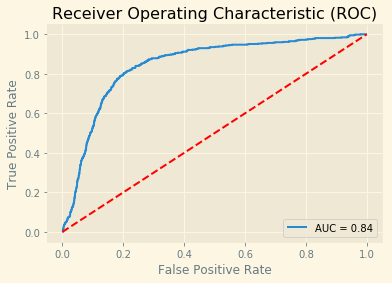

AUC score: 0.8447813999937022


In [185]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=gnb)

<a id = "80031"> <h2> 3.1 Oversampling (SMOTE) </h2> </a>
We oversample the <b> training </b> dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [186]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 23)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The SMOTE Algorithm has oversampled the instances in the minority class and made it equal to majority class:
* Both classes (0 & 1) now have 7291 instances, the <b> training </b> dataset is balanced.
* Class 1 increased from 1340 instances to 7291 instances, an increase of 5951 instances of class 1.

In [187]:
# define the model
gnb1 = GaussianNB()

# train the model
gnb1.fit(X_train_res, y_train_res)

# given a trained model, predict the label of a new set of data. 
y_pred = gnb1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.52      0.67      3131
           1       0.26      0.92      0.40       568

    accuracy                           0.58      3699
   macro avg       0.62      0.72      0.54      3699
weighted avg       0.86      0.58      0.63      3699



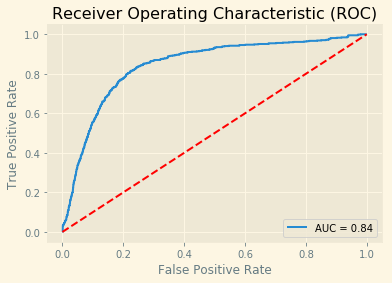

AUC score: 0.8432007728260331


In [188]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=gnb1)

<a id = "80032"> <h2> 3.2 Undersampling (NearMiss)  </h2> </a>
We undersample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [189]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, the shape of train_X: (2680, 23)
After Undersampling, the shape of train_y: (2680,) 

After Undersampling, counts of label '1': 1340
After Undersampling, counts of label '0': 1340


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The NearMiss Algorithm has undersampled the instances in the majority class and made it equal to minority class:
* Both classes (0 & 1) now have 1340 instances, the dataset is balanced.
* Class 0 decreased from 7291 instances to 1340 instances, a decrease of 5951 instances of class 0.

In [190]:
# train the model on train set 
gnb2 = GaussianNB()
gnb2.fit(X_train_miss, y_train_miss) 
y_pred = gnb2.predict(X_test) 

# print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3131
           1       0.07      0.05      0.06       568

    accuracy                           0.76      3699
   macro avg       0.46      0.47      0.46      3699
weighted avg       0.72      0.76      0.74      3699



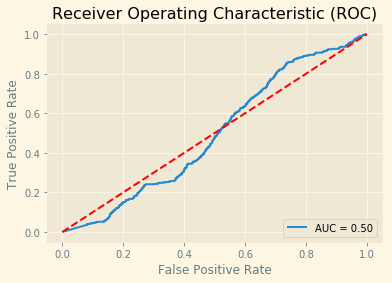

AUC score: 0.49563204843882847


In [191]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=gnb2)

## Cross Validation Using KFold </b>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<a id = "80033"> <h2> 3.3 Cross Validation (Oversampling)  </h2> </a>

We oversample X and Y with cross validation and NOT using the previously employed 1 hold-out method!

In [192]:
sm = SMOTE(random_state = 2019) 
X_res, y_res = sm.fit_sample(X, Y) 

print('After OverSampling, the shape of X_res: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y_res: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X_res: (20844, 23)
After OverSampling, the shape of y_res: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [193]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result = cross_val_score(gnb1, X_res, y_res, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(gnb1, X_res, y_res, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(gnb1, X_res, y_res, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')


print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.70810545 0.69996905 0.67958027 0.67742621 0.69246898 0.70240027
 0.6473011  0.68017384 0.67122856 0.6921929 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.6851 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.86916762 0.86809928 0.8660023  0.85687222 0.86481255 0.86959239
 0.85741374 0.85584599 0.85759887 0.86486046] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.86302654149

<b> ROC Curve Cross validation on oversampled dataset

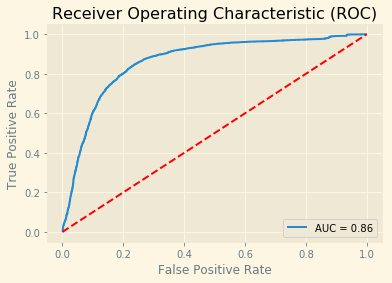

AUC score: 0.8618636837674287


In [194]:
# roc curve with KFold
roc_curve(X_test=X_res, y_test=y_res, model=gnb1)

<a id = "80034"> <h2> 3.4 Cross Validation (Undersampling)  </h2> </a>

In [195]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_miss, y_miss = nr.fit_sample(X, Y)

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result = cross_val_score(gnb2, X_miss, y_miss, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(gnb2, X_miss, y_miss, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(gnb2, X_miss, y_miss, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the accuracy results:')
print('--------------------------------------------------------------------------')
print(result, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


--------------------------------------------------------------------------
All the accuracy results:
--------------------------------------------------------------------------
[0.5052356  0.51832461 0.51570681 0.5        0.51308901 0.56806283
 0.49343832 0.52493438 0.53543307 0.54068241] 

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.5215 

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.36577001 0.36764532 0.37240416 0.36444041 0.36949135 0.44149242
 0.36067389 0.38679531 0.40871592 0.40546071] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.3843 

--------------------

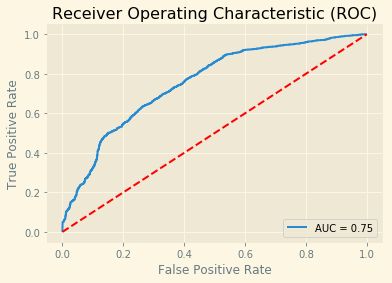

AUC score: 0.7542355864527159


In [196]:
# roc curve with KFold
roc_curve(X_test=X_miss, y_test=y_miss, model=gnb2)

<b> Cross validation on X and Y

In [197]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(gnb1, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(gnb1, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(gnb1, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.7054 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.7309 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.8506


<a id = "80035"> <h2> 3.5 Feature Importance </h2> </a>

For Feature Importance we consider the oversampled trained/fitted model (named: 'gnb1') which has better results.

In [111]:
# class 0 variance
gnb1.sigma_[0]
# class 1 variance
gnb1.sigma_[1]

# mean of each feature per class
# array, shape (n_classes, n_features)
# class 0 mean
gnb1.theta_[0]
# class 1 mean
gnb1.theta_[1]

lst_variance_class_0 = []
lst_mean_class_0 = []
lst_features = []

for i in gnb1.sigma_[0]:
    lst_variance_class_0.append((i).round(2))
for j in list(X.columns):
        lst_features.append(j)
for k in gnb1.theta_[0]:
    lst_mean_class_0.append(k)
        
# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Variance Class 0": lst_variance_class_0,  "Mean Class 0":lst_mean_class_0}
df_class_0 = pd.DataFrame(dict_lists)
# sort descending and reset index
df_class_0.sort_values(by=['Variance Class 0'],  ascending=False, inplace=True)
df_class_0.reset_index(inplace=True, drop=True)
df_class_0

,Feature,Variance Class 0,Mean Class 0
0,add_exit_bounce_rates_yj_stdev_zscore,1.04,0.107951
1,Administrative_yj_stdev_zscore,0.98,-0.079638
2,PageValues_yj_stdev_zscore,0.55,-0.266066
3,Region_1,0.24,0.385407
4,TrafficType_2,0.21,0.293924
5,Month_May,0.21,0.291181
6,TrafficType_1,0.17,0.209436
7,Month_Nov,0.17,0.216431
8,OperatingSystems_3,0.17,0.214785
9,TrafficType_3,0.15,0.179399


In [112]:
lst_variance_class_1 = []
lst_mean_class_1 = []
lst_features = []

for i in gnb1.sigma_[1]:
    lst_variance_class_1.append((i).round(2))
for j in list(X.columns):
        lst_features.append(j)
for k in gnb1.theta_[1]:
    lst_mean_class_1.append(k)
        
# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Variance Class 1": lst_variance_class_1,  "Mean Class 1":lst_mean_class_1}
df_class_1 = pd.DataFrame(dict_lists)
# sort descending and reset index
df_class_1.sort_values(by=['Variance Class 1'],  ascending=False, inplace=True)
df_class_1.reset_index(inplace=True, drop=True)
df_class_1

,Feature,Variance Class 1,Mean Class 1
0,PageValues_yj_stdev_zscore,0.92,1.463836
1,Administrative_yj_stdev_zscore,0.90,0.366854
2,add_exit_bounce_rates_yj_stdev_zscore,0.35,-0.593416
3,TrafficType_2,0.24,0.446107
4,Month_Nov,0.24,0.391667
5,Region_1,0.23,0.382240
6,VisitorType_New_Visitor,0.16,0.210895
7,Month_May,0.16,0.206836
8,TrafficType_1,0.11,0.133662
9,Month_Dec,0.09,0.106043


<a id = "810"> <h2> Results </h2> </a>
___

<b> Left align all markdown tables

In [113]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

### Pipeline 1 Results </b>
_Note:_ tool used for Excel table to markdown conversion, namely: https://tableconvert.com/

| **Model**                                                | **weighted avg F1-score** | **AUC score** |
|  --------------------------------------------------------|:-------------------------:|:-------------:|
| Basic Model 70 Training set, 30% Test Set                | 0\.80                     | 0\.842        |
| Oversampled 70% Training Set, 30% Test Set  \(SMOTE\)    | 0\.61                     | 0\.834        |
| Undersampled 70% Training set, 30% Test Set \(Nearmiss\) | 0\.73                     | 0\.481        |
| Cross validation Oversampled X, y \(KFold = 10\)         | 0\.39                     | 0\.877        |
| Cross validation Undersampled X, y \(KFold = 10\)        | 0\.42                     | 0\.783        |
| Cross validation X, y \(KFold = 10\)                     | 0\.727                    | 0\.841        |

### Pipeline 2 Results </b>

| **Model**                                                | **weighted avg F1-score** | **AUC score** |
|--------------------------------------------------------  |:-------------------------:|:-------------:|
| Basic Model 70 Training set, 30% Test Set                | 0\.13                     | 0\.862        |
| Oversampled 70% Training Set, 30% Test Set  \(SMOTE\)    | 0\.13                     | 0\.861        |
| Undersampled 70% Training set, 30% Test Set \(Nearmiss\) | 0\.74                     | 0\.489        |
| Cross validation Oversampled X, y \(KFold = 10\)         | 0\.39                     | 0\.877        |
| Cross validation Undersampled X, y \(Kfold = 10\)        | 0\.42                     | 0\.783        |
| Cross validation X, y \(KFold = 10\)                     | 0\.15                     | 0\.869        |


### Pipeline 3 Results </b>

| **Model**                                                | **weighted avg F1-score** | **AUC score** |
|  --------------------------------------------------------|:-------------------------:|:-------------:|
| Basic Model 70 Training set, 30% Test Set                | 0\.80                     | 0\.845        |
| Oversampled 70% Training Set, 30% Test Set  \(SMOTE\)    | 0\.63                     | 0\.843        |
| Undersampled 70% Training set, 30% Test Set \(Nearmiss\) | 0\.74                     | 0\.496        |
| Cross validation \(KFold = 10\) Oversampled X, y         | 0\.69                     | 0\.863        |
| Cross validation \(Kfold = 10\) Undersampled X, y        | 0\.38                     | 0\.752        |
| Cross validation X, y \(KFold = 10\)                     | 0\.731                    | 0\.851        |


<b> Conclusion: </b> 
___
<b> Pipeline 1 and Pipeline 3 </b> have similar scores for the <b> "average weighted f1-score" </b> and <b> "average auc-score" </b>, whereby the most reliable results are obtained by using cross validation and oversampling. They outperform <b> Pipeline 2 </b> results for the weighted average f1-score and average auc-sore.